In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def combined_sine_wave(t, frequencies, amplitudes):
    """Generate a signal composed of multiple sine waves."""
    signal = np.zeros_like(t)
    for f, a in zip(frequencies, amplitudes):
        signal += a * np.sin(2 * np.pi * f * t)
    return signal

# Sampling parameters
sampling_rate = 1000  # Hz
duration = 1.0  # seconds
t = np.linspace(0, duration, sampling_rate * duration, endpoint=False)

# Define frequencies and amplitudes
frequencies = [5, 50, 120]  # Hz
amplitudes = [3, 1, 0.5]

# Generate signal
signal = combined_sine_wave(t, frequencies, amplitudes)

# Compute Fourier Transform
yf = fft(signal)
xf = fftfreq(len(t), 1 / sampling_rate)

# Plot original signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Original Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Plot Fourier Transform (Magnitude Spectrum)
plt.subplot(2, 1, 2)
plt.plot(xf[:len(xf)//2], np.abs(yf[:len(yf)//2]))  # Only plot positive frequencies
plt.title("Fourier Transform (Magnitude Spectrum)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()


TypeError: 'float' object cannot be interpreted as an integer

/Users/oscartesniere/Documents/GitHub/MAIS202-FinalProject/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


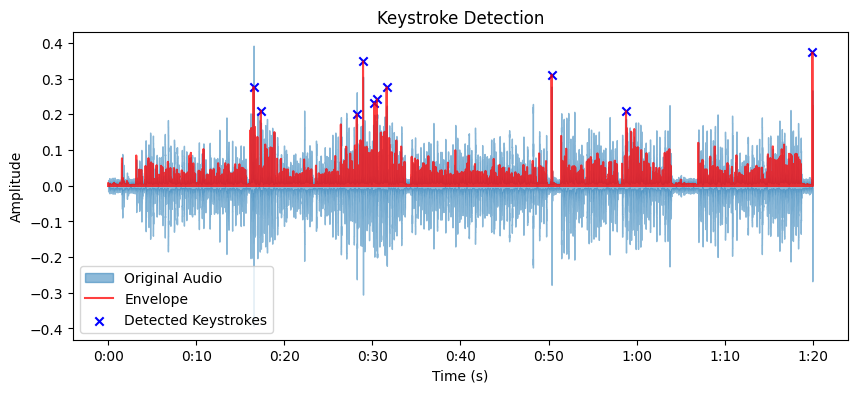

/var/folders/9h/65ctz95j25g6fypfgby_mr400000gn/T/ipykernel_32944/3848952911.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


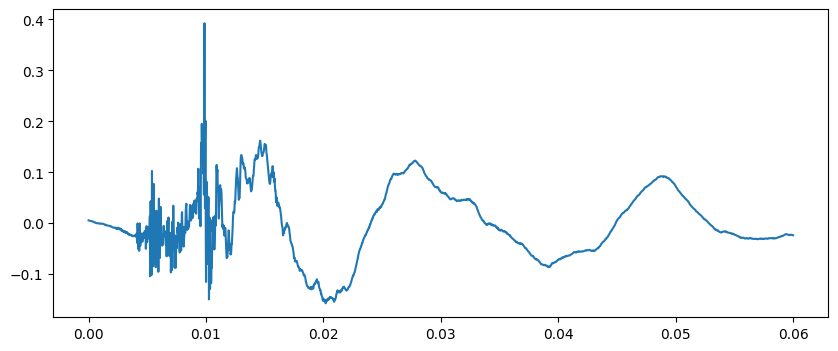

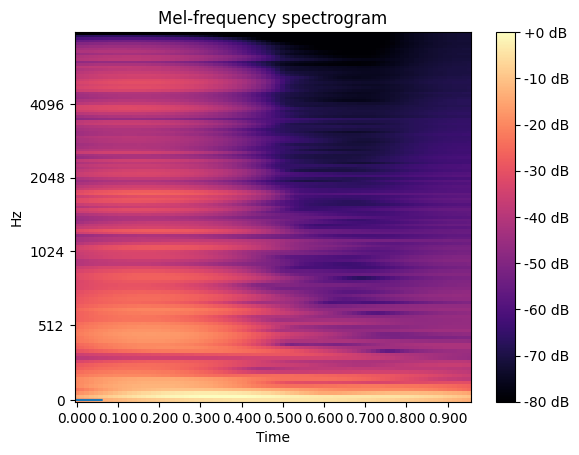

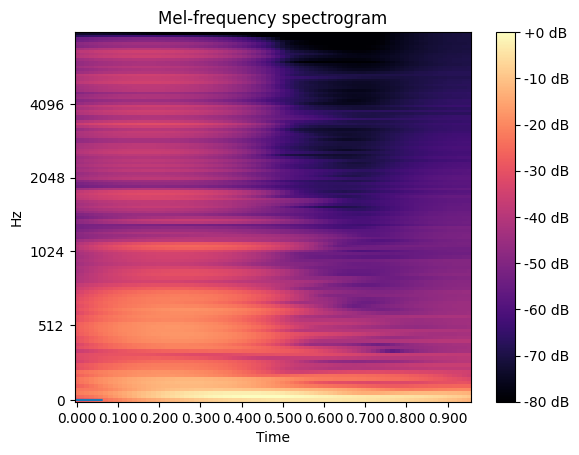

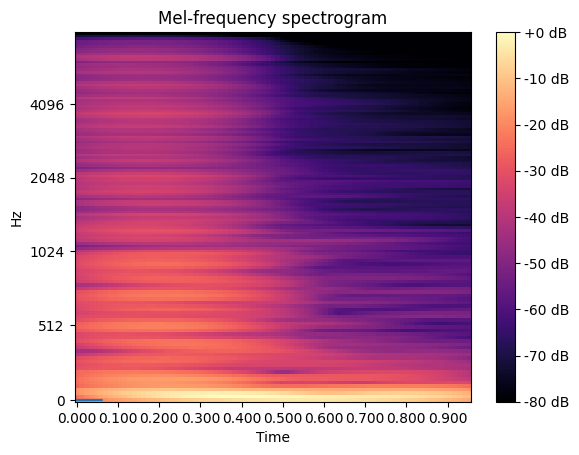

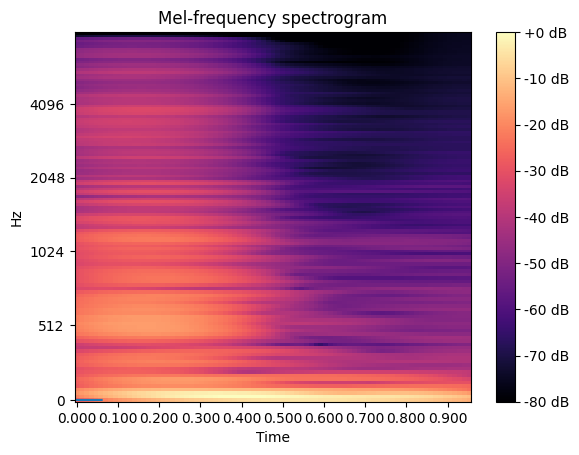

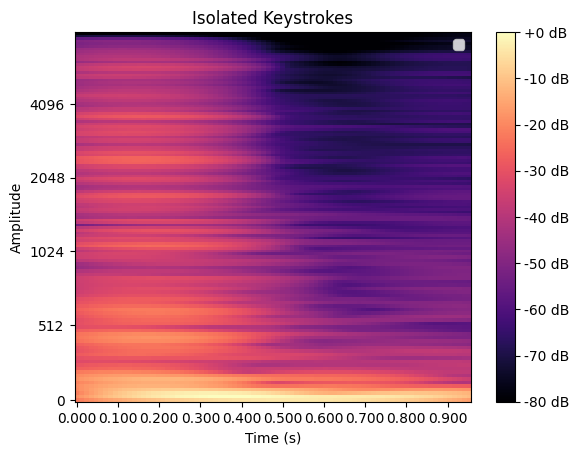

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal
import numpy as np

# Load the audio file
audio, sr = librosa.load("macbook/audio.wav", sr=None)

# Apply a high-pass filter to remove low-frequency noise
sos = signal.butter(4, 500, 'hp', fs=sr, output='sos')
filtered_audio = signal.sosfilt(sos, audio)

# Compute the envelope of the signal to detect keystroke events
envelope = np.abs(signal.hilbert(filtered_audio))

# Find peaks corresponding to keystrokes
peaks, _ = signal.find_peaks(envelope, height=np.max(envelope) * 0.5, distance=sr * 0.1)

# Plot the original waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr, alpha=0.5, label="Original Audio")
plt.plot(np.linspace(0, len(audio) / sr, len(envelope)), envelope, color='red', alpha=0.75, label="Envelope")
plt.scatter(peaks / sr, envelope[peaks], color='blue', marker='x', label="Detected Keystrokes")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Keystroke Detection")
plt.show()

# Extract and plot isolated keystrokes
plt.figure(figsize=(10, 4))
for i, peak in enumerate(peaks[:5]):  # Show only first 5 keystrokes
    start = max(0, peak - int(0.01 * sr))  # 10 ms before
    end = min(len(audio), peak + int(0.05 * sr))  # 50 ms after
    plt.plot(np.linspace(0, (end - start) / sr, end - start), audio[start:end], label=f"Keystroke {i+1}")
    spectrogram = librosa.feature.melspectrogram(y=audio[start:end], sr=sr,hop_length=32)

    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(spectrogram, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',

                            y_axis='mel', sr=sr,

                            fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Isolated Keystrokes")
plt.legend()
plt.show()



/var/folders/9h/65ctz95j25g6fypfgby_mr400000gn/T/ipykernel_32944/3505001343.py:22: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(stft_result, ref=np.max)


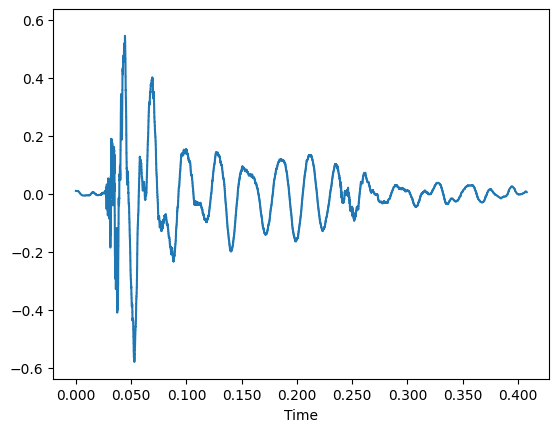

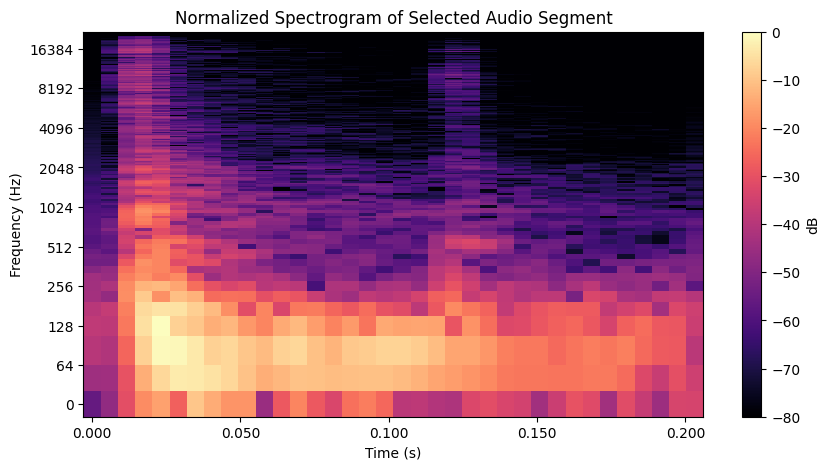

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load the audio file
audio, sr = librosa.load("test_key.wav", sr=None)

# Extract the segment of interest
segment = audio[109000:118000]

librosa.display.waveshow(segment)

exit

# Compute STFT (Short-Time Fourier Transform)
stft_result = librosa.stft(segment, n_fft=1024, hop_length=256)

# Convert to magnitude

# Convert to dB for visualization
spectrogram = librosa.amplitude_to_db(stft_result, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=256, x_axis="time", y_axis="log", cmap="magma")
plt.colorbar(label="dB")
plt.title("Normalized Spectrogram of Selected Audio Segment")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()


In [61]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wav

# Recording settings
fs = 44100  # Sample rate (Hz)
duration = 5  # Duration (seconds)

print("Recording...")
audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='int16')
sd.wait()  # Wait until recording is finished
print("Recording finished.")

# Save as a WAV file
wav.write("test_key.wav", fs, audio)
print("Audio saved as 'recorded_audio.wav'")


Recording...
Recording finished.
Audio saved as 'recorded_audio.wav'
